In [2]:
import pandas as pd  
import numpy as np

import datetime
import scipy.optimize as sco
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df=pd.read_csv('prices.csv',index_col=0)
df=df[10:20]
df

,SH600000.csv,SH600010.csv,SH600015.csv,SH600016.csv,SH600018.csv,SH600028.csv,SH600030.csv,SH600036.csv,SH600048.csv,SH600050.csv,...,SH601668.csv,SH601688.csv,SH601766.csv,SH601800.csv,SH601818.csv,SH601857.csv,SH601901.csv,SH601988.csv,SH601989.csv,SH601998.csv
10,125.261700,13.177959,33.169740,149.00140,7.502602,17.029976,92.310460,128.518340,256.08182,8.543648,...,10.426581,18.881676,11.095017,15.125316,5.158898,10.029867,5.688645,6.282132,7.436012,8.065717
11,127.235430,12.946232,33.151737,148.85287,7.514912,16.601929,93.169495,126.391530,259.60950,8.329944,...,10.758067,18.866346,11.145440,14.790277,5.165897,10.062693,5.709657,6.297745,7.200390,8.043388
12,127.629100,13.230769,32.913315,147.52730,7.616479,16.427692,93.357285,127.406166,261.43710,8.137968,...,10.581298,18.715618,11.048557,14.558727,5.216052,10.234972,5.638132,6.281973,6.758409,8.061624
13,127.604360,13.189113,33.040874,147.99202,7.615161,17.023530,93.259230,125.742550,264.71340,8.096342,...,10.690241,18.756426,10.890526,14.525050,5.246866,10.214597,5.732859,6.296392,7.033283,8.002290
14,126.997790,13.000059,33.287910,146.37315,7.561289,16.868559,92.398620,128.201840,266.30820,8.014611,...,10.541474,18.711378,11.293508,14.692647,5.321826,10.245485,5.584404,6.303828,6.827928,7.992506
15,122.251625,13.014211,32.802856,146.38762,7.404022,16.641472,92.092050,126.003910,251.46220,8.502708,...,10.323008,18.714087,11.091493,14.885594,5.131170,9.908001,5.782319,6.276271,7.446372,8.000848
16,124.464480,12.771042,32.795040,146.43250,7.399339,16.200472,92.938450,123.943405,254.67404,8.295526,...,10.600168,18.647291,11.137467,14.539125,5.141910,9.955700,5.785413,6.291216,7.233114,7.988303
17,124.632065,13.074643,32.549923,145.02875,7.501396,15.954873,93.138920,124.794680,256.34525,8.104375,...,10.449969,18.578903,11.012749,14.325519,5.180753,10.114767,5.728828,6.275911,6.790864,8.001900
18,124.728410,13.037927,32.698610,145.68796,7.505558,16.589048,93.081610,123.280410,259.43298,8.061807,...,10.551472,18.582160,10.873374,14.289101,5.215317,10.078055,5.807061,6.290191,7.058378,7.943614
19,124.337420,12.832878,32.900543,144.28703,7.447472,16.540352,92.219130,126.086670,260.95180,7.986541,...,10.421030,18.604229,11.300344,14.502995,5.285498,10.121989,5.662402,6.298035,6.851937,7.940742


In [11]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

In [12]:
mean_returns

SH600000.csv   -0.000709
SH600010.csv   -0.002828
SH600015.csv   -0.000880
SH600016.csv   -0.003549
SH600018.csv   -0.000768
SH600028.csv   -0.002975
SH600030.csv   -0.000090
SH600036.csv   -0.002002
SH600048.csv    0.002318
SH600050.csv   -0.007152
SH600089.csv   -0.002606
SH600104.csv    0.001754
SH600109.csv   -0.000248
SH600111.csv   -0.005463
SH600150.csv   -0.003773
SH600256.csv   -0.001923
SH600406.csv   -0.004890
SH600518.csv   -0.001419
SH600519.csv   -0.004651
SH600583.csv   -0.002652
SH600585.csv   -0.005837
SH600637.csv    0.003028
SH600690.csv    0.005119
SH600837.csv   -0.001609
SH600887.csv   -0.005017
SH600893.csv   -0.004141
SH600958.csv   -0.000680
SH600999.csv    0.000426
SH601006.csv   -0.000439
SH601088.csv   -0.005727
SH601166.csv   -0.000700
SH601169.csv   -0.000552
SH601186.csv    0.000696
SH601288.csv   -0.001370
SH601318.csv   -0.002242
SH601328.csv   -0.000699
SH601390.csv    0.001343
SH601398.csv   -0.000299
SH601601.csv   -0.001770
SH601628.csv   -0.000854


In [13]:
df.columns

Index(['SH600000.csv', 'SH600010.csv', 'SH600015.csv', 'SH600016.csv',
       'SH600018.csv', 'SH600028.csv', 'SH600030.csv', 'SH600036.csv',
       'SH600048.csv', 'SH600050.csv', 'SH600089.csv', 'SH600104.csv',
       'SH600109.csv', 'SH600111.csv', 'SH600150.csv', 'SH600256.csv',
       'SH600406.csv', 'SH600518.csv', 'SH600519.csv', 'SH600583.csv',
       'SH600585.csv', 'SH600637.csv', 'SH600690.csv', 'SH600837.csv',
       'SH600887.csv', 'SH600893.csv', 'SH600958.csv', 'SH600999.csv',
       'SH601006.csv', 'SH601088.csv', 'SH601166.csv', 'SH601169.csv',
       'SH601186.csv', 'SH601288.csv', 'SH601318.csv', 'SH601328.csv',
       'SH601390.csv', 'SH601398.csv', 'SH601601.csv', 'SH601628.csv',
       'SH601668.csv', 'SH601688.csv', 'SH601766.csv', 'SH601800.csv',
       'SH601818.csv', 'SH601857.csv', 'SH601901.csv', 'SH601988.csv',
       'SH601989.csv', 'SH601998.csv'],
      dtype='object')

In [14]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in df.columns])
        
    return results_df

In [15]:

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

In [16]:
results_frame

,ret,stdev,sharpe,SH600000.csv,SH600010.csv,SH600015.csv,SH600016.csv,SH600018.csv,SH600028.csv,SH600030.csv,...,SH601668.csv,SH601688.csv,SH601766.csv,SH601800.csv,SH601818.csv,SH601857.csv,SH601901.csv,SH601988.csv,SH601989.csv,SH601998.csv
0,-0.436694,0.125073,-3.491497,0.000645,0.020188,0.008990,0.005818,0.028129,0.039693,0.027239,...,0.026428,0.027339,0.005822,0.001146,0.036315,0.023865,0.041459,0.032446,0.039195,0.029025
1,-0.347856,0.090063,-3.862346,0.000904,0.032819,0.029078,0.035595,0.017106,0.039004,0.014670,...,0.003593,0.012988,0.035650,0.016976,0.014116,0.010479,0.013917,0.002375,0.004518,0.015089
2,-0.421632,0.055070,-7.656265,0.041402,0.026542,0.003741,0.009568,0.016761,0.005215,0.009979,...,0.013986,0.027108,0.007826,0.026200,0.020403,0.031147,0.012592,0.003024,0.011211,0.038469
3,-0.380164,0.080626,-4.715125,0.013033,0.004093,0.033551,0.009492,0.006438,0.034481,0.028669,...,0.031587,0.007860,0.005069,0.020050,0.037898,0.032511,0.016567,0.027333,0.021890,0.037384
4,-0.456466,0.108390,-4.211348,0.008698,0.036228,0.025178,0.028369,0.020941,0.015549,0.004534,...,0.009446,0.020638,0.039827,0.017466,0.000994,0.019434,0.019197,0.019052,0.034036,0.036284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.404624,0.133910,-3.021615,0.011145,0.019393,0.000995,0.038329,0.022852,0.012103,0.025055,...,0.003894,0.005501,0.024137,0.022328,0.000688,0.014054,0.027906,0.008036,0.028832,0.006272
99996,-0.307567,0.099045,-3.105323,0.036925,0.000167,0.009310,0.003108,0.031400,0.026169,0.028534,...,0.005110,0.022119,0.005187,0.016780,0.029299,0.004082,0.005561,0.024351,0.025270,0.020692
99997,-0.277100,0.102128,-2.713268,0.018718,0.018469,0.038661,0.021196,0.013679,0.019733,0.026132,...,0.007146,0.000524,0.012135,0.027709,0.017687,0.018276,0.014591,0.044131,0.005213,0.015221
99998,-0.401353,0.054422,-7.374868,0.015883,0.008361,0.011007,0.025650,0.042851,0.030653,0.024584,...,0.032301,0.022531,0.023024,0.003264,0.008778,0.004250,0.016387,0.000165,0.032393,0.016885


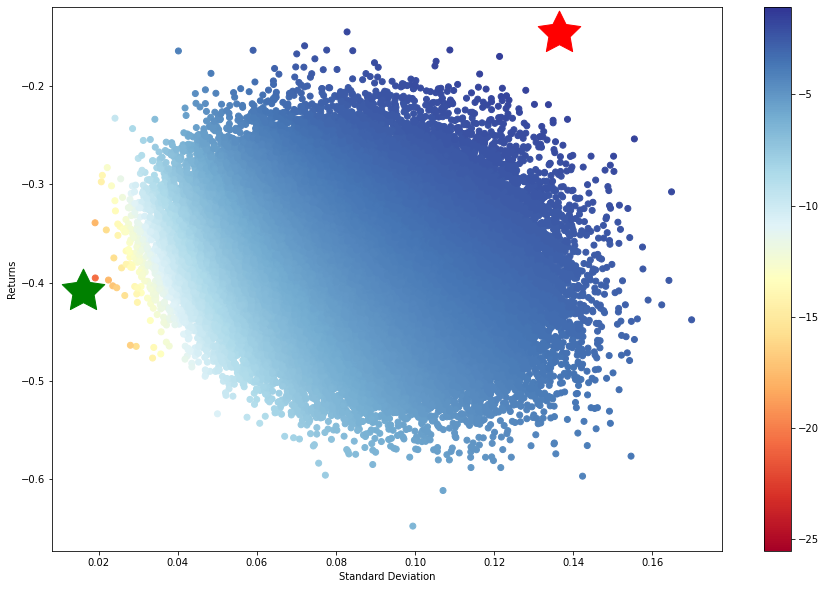

In [17]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [20]:
max_sharpe_port.to_frame().T.sort_values(by=63311, ascending=False, axis=1)

,ret,stdev,sharpe,SH600000.csv,SH600010.csv,SH600015.csv,SH600016.csv,SH600018.csv,SH600028.csv,SH600030.csv,...,SH601668.csv,SH601688.csv,SH601766.csv,SH601800.csv,SH601818.csv,SH601857.csv,SH601901.csv,SH601988.csv,SH601989.csv,SH601998.csv
4763,-0.145802,0.136474,-1.068352,0.040757,0.020885,0.009279,0.002597,0.017234,0.009601,0.028382,...,0.041187,0.011977,0.045805,0.005384,0.033502,0.011535,0.020611,0.038487,0.000996,0.01183


In [54]:
min_vol_port.to_frame().T.sort_values(by=85055, ascending=True, axis=1)

,sharpe,ret,model33,model37,model21,model6,model49,model47,model44,model1,...,model15,model43,model35,model3,model50,model19,model18,model10,model25,stdev
85055,-21.97153,-1.394142,0.001239,0.001544,0.002737,0.003719,0.003824,0.003863,0.004296,0.004483,...,0.034605,0.036485,0.036651,0.039425,0.039847,0.040567,0.043141,0.043823,0.04416,0.063452


In [21]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [22]:
frame = pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=df.columns).T

In [24]:
frame.T.sort_values(by=0, ascending=False, axis=0)

,0
SH600089.csv,0.20
SH600104.csv,0.17
SH600690.csv,0.16
SH601901.csv,0.11
SH600637.csv,0.07
SH601818.csv,0.06
SH600837.csv,0.06
SH601989.csv,0.05
SH601186.csv,0.03
SH600150.csv,0.02


In [ ]:
frame